In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

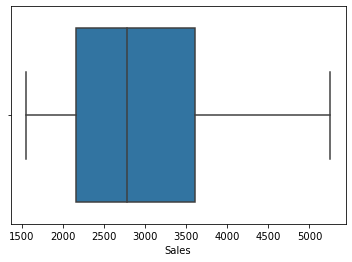

In [20]:
cocola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
sns.boxplot("Sales",data=cocola)

In [21]:
#Splitting data
Train = cocola.head(30)
Test = cocola.tail(12) 


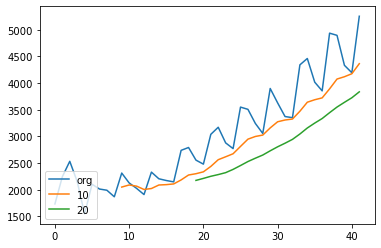

In [22]:
#Moving Average
cocola.Sales.plot(label="org")
for i in range(10,25,10):
    cocola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<ipython-input-23-6de2d70c50c4>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(cocola.Sales,freq=10)


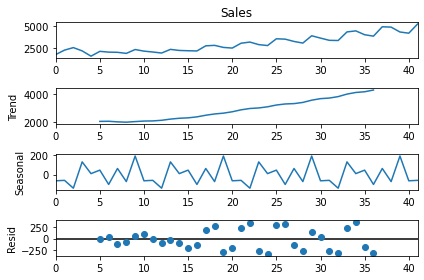

In [23]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(cocola.Sales,freq=10)
decompose_ts_add.plot()
plt.show() 

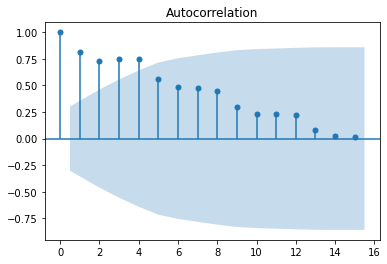

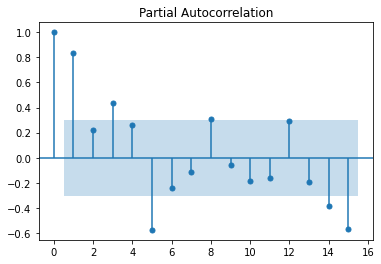

In [24]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocola.Sales,lags=15)
tsa_plots.plot_pacf(cocola.Sales,lags=15)
plt.show() 
 

In [25]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)  
   

In [26]:
# Simple Exponential Method
Train["Sales"] = Train["Sales"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.3)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)   

<ipython-input-26-3bceef2d830c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Sales"] = Train["Sales"].astype('double')
C:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


18.53000097645553

In [27]:

# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)   

<ipython-input-27-9b8e4fdf9316>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


11.213842666521865

In [28]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)  

5.0739837597345385

In [29]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)  

4.3607193571347596

In [30]:
#Final Model by combining train and test
cocola["Sales"] = cocola["Sales"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(cocola["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()   


In [31]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10) 

42    4921.301765
43    4587.847865
44    4532.358828
45    5757.281021
46    5816.320498
47    5208.938124
48    4956.923091
49    6238.309147
50    6082.966385
51    5456.507649
dtype: float64